# CIMR SIT ATBD Notebook

In [1]:
using Plots
using LaTeXStrings
using Optim

In [2]:
using BenchmarkTools

In [3]:
I(p)=f(x)=p[1]-(p[1]-p[2])*exp(-x/p[3])
Q(p)=f(x)=p[1]-(p[1]-p[2])*exp(-(x/p[3])^p[4])
fI(x)=I((232.2,108.3,13.4))(x)
fQ(x)=Q((33.8,81.2,33.7,1.64))(x)


fQ (generic function with 1 method)

In [4]:
cost(II,QQ)=f(x)=(fI(x)-II)^2+(fQ(x)-QQ)^2
retrieval(ii,qq)=maximize(x->-cost(ii,qq)(x),0,200).res.minimizer 


retrieval (generic function with 1 method)

In [5]:
retrieval2(ii,qq)=optimize(cost(ii,qq),0,200) |> minimum


retrieval2 (generic function with 1 method)

In [6]:
retrieval2(240,20)

251.2806485537714

In [7]:
Qs=20:90
Is=100:270
out=[retrieval(ii,qq) for ii=Is,qq=Qs];

In [8]:

using Plots

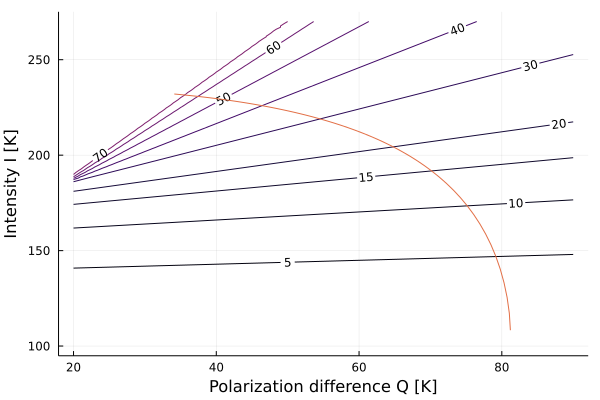

In [9]:
contour(Qs,Is,out,levels=[0,5,10,15,20,30,40,50,60,70],contour_labels=true,colorbar=false,dpi=150)
sit=0:90
plot!(fQ.(sit),fI.(sit),legend=false)
xlabel!("Polarization difference Q [K]")
ylabel!("Intensity I [K]")
#savefig("retrieval_curve.png")

In [10]:
cfdd(temp,duration)=1.33*(-(temp+1.8)*duration)^0.58
dcfdd(temp,duration)=1.33*0.58*(-(temp+1.8))/((-(temp+1.8)*duration)^0.42)

dcfdd (generic function with 1 method)

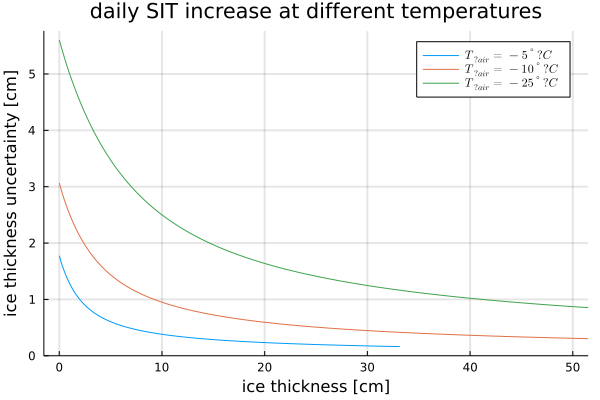

In [11]:
days=0:0.01:80

max_ig(T,t)=cfdd(T,t+1)-cfdd(T,t-0)
sittime(sit,temp)=(1/(sit*1.33*(-temp+1.8)))^(1/0.58)
plot(gridlinewidth=2)
for temp in [-5,-10,-25]    
    plot!(cfdd.(temp,days),max_ig.((temp,),days)*0.68,label=latexstring("T_{\\mbox{air}} = $temp ^\\circ \\mbox{C}"))
end
xlims!(-1.5,51.5)
title!(("daily SIT increase at different temperatures"))
xlabel!("ice thickness [cm]")
ylabel!("ice thickness uncertainty [cm]")

In [12]:
function owmix(x,owf)
    owtbh=65
    owtbv=155
    owi=owtbv/2+owtbh/2
    owq=owtbv-owtbh
    IR=fI(x)
    QR=fQ(x)
    I=IR*(1-owf)+owi*owf
    Q=QR*(1-owf)+owq*owf
    retrieval(I,Q)
end

owerr(x)=(abs(x-owmix(x,-0.05))+abs(x-owmix(x,0.05)))*0.5

function retrerr(x,ra)
    IR=fI(x)
    QR=fQ(x)
    ixmax=retrieval(IR+ra*sqrt(2)/2,QR)
    ixmin=retrieval(IR-ra*sqrt(2)/2,QR)
    qxmax=retrieval(IR,QR+ra*sqrt(2))
    qxmin=retrieval(IR,QR-ra*sqrt(2))
    #mean((x.-[ixmax,ixmin,qxmax,qxmin]).^2)^0.5
    (maximum(x.-[ixmax,ixmin])^2+maximum(x.-[qxmax,qxmin])^2)^0.5
end

sittime(sit,temp)=-(sit/1.33)^(1/0.58)/(temp+1.8)

function cfdd_unc(sit)
    t=sittime(sit,-25)
    return (cfdd(-25,t+1)-cfdd(-25,t))*0.68
end


    #retrieval(IR*)
#plot(owmix.(0:50,-0.05).-owmix.(0:50,0.0))
#plot!(owmix.(0:50,0.0)-owmix.(0:50, 0.05))

    #(owmix.(0:200,0.05))
function comb_error(sit)
    return sqrt(cfdd_unc(sit)^2+retrerr(sit,5)^2+owerr(sit)^2)
end

comb_error (generic function with 1 method)

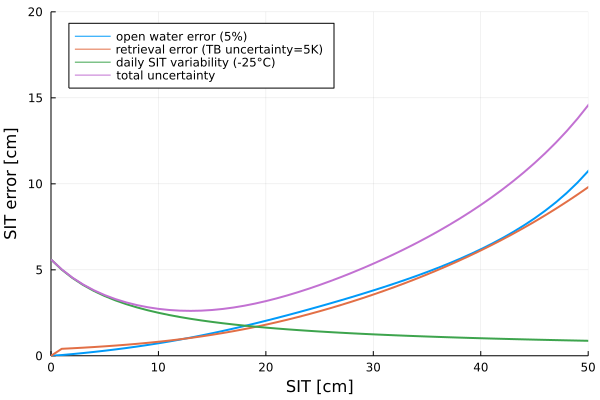

In [13]:
plot(sit,owerr.(sit),label="open water error (5%)",lw=2)
plot!(sit,retrerr.(sit,(5,)),label="retrieval error (TB uncertainty=5K)",lw=2)
plot!(sit,cfdd_unc.(sit),label="daily SIT variability (-25°C)",lw=2)
plot!(sit,comb_error.(sit),label="total uncertainty",lw=2,legend=:topleft)
xlims!(0,50)
ylims!(0,20)
xlabel!("SIT [cm]")
ylabel!("SIT error [cm]",dpi=200)
#savefig("/home/huntemann/Seafile/myHome/CIMR_errors.png")


In [14]:
retrerr(50,5)

9.80421038985012